### Ch.2 지도 학습 (Supervised Learning)
---
- 2.1 분류와 회귀 
<br><br>
- 2.2 일반화, 과대적합, 과소적합  
    - 2.2.1 모델 복잡도와 데이터셋 크기의 관계
<br><br>
- 2.3 지도 학습 알고리즘  
    - 2.3.1 예제에 사용할 데이터셋 
    - 2.3.2 k-최근접 이웃 
    - 2.3.3 선형 모델 
    - 2.3.4 나이브 베이즈 분류기  
    - 2.3.5 결정 트리  
    - 2.3.6 결정 트리의 앙상블 
    - 2.3.7 (한국어판 부록) 배깅, 엑스트라 트리, 에이다부스트 
    - 2.3.8 커널 서포트 벡터 머신 
    - 2.3.9 신경망(딥러닝)
<br><br>
- 2.4 분류 예측의 불확실성 추정   
    - 2.4.1 결정 함수   
    - 2.4.2 예측 확률   
    - 2.4.3 다중 분류에서의 불확실성
<br><br>
- 2.5 요약 및 정리


---
#### Library & Setting 

In [94]:
# Data 
import os 
import sys 
import imp 
import numpy as np 
import pandas as pd 
import warnings

# Visual 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics






In [2]:
os.getcwd()

'/Users/home/Desktop/ML/ch2'

In [95]:
# Setting
sys.path.append('../packages/')
pd.options.display.max_rows = None
pd.options.display.max_columns = None

warnings.filterwarnings("ignore")
%matplotlib inline

---
#### 2.1 분류와 회귀 
* Classification(분류) : Model For Binomial, Multi Nomial, Multi Class
<br> <br>
* Regression(회귀) : Model For Continuous Data (Include Discrete)

---

#### 2.2 일반화, 과대적합, 과소적합  
    - 2.2.1 모델 복잡도와 데이터셋 크기의 관계

---

#### 2.3 지도 학습 알고리즘  
    - 2.3.1 예제에 사용할 데이터셋 
    - 2.3.2 k-최근접 이웃 
    - 2.3.3 선형 모델 
    - 2.3.4 나이브 베이즈 분류기  
    - 2.3.5 결정 트리  
    - 2.3.6 결정 트리의 앙상블 
    - 2.3.7 (한국어판 부록) 배깅, 엑스트라 트리, 에이다부스트 
    - 2.3.8 커널 서포트 벡터 머신 
    - 2.3.9 신경망(딥러닝)

##### 2.3.1 예제에 사용할 데이터셋

- Breast Cancer

In [5]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer() 

sklearn.utils._bunch.Bunch

In [6]:
for i, k in enumerate(cancer.keys()): 
    print(i,k)

0 data
1 target
2 frame
3 target_names
4 DESCR
5 feature_names
6 filename
7 data_module


In [64]:
cancer_x = pd.DataFrame(
    data=cancer['data'],
    columns=cancer['feature_names']
) 

cancer_y = pd.DataFrame(
    data=cancer['target'],
    columns= ['target']
)

In [65]:
cancer_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [66]:
cancer_y['target'] = ['mal' if x == 0 else 'bin' for x in cancer_y['target']]
cancer_y.value_counts()

target
bin       357
mal       212
dtype: int64

- KNN

In [69]:
X_train, X_test, y_train, y_test = train_test_split(cancer_x, cancer_y, stratify=cancer_y['target'], random_state=66)


In [103]:

# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(cancer_x, cancer_y, stratify=cancer.target, random_state=66)

# Train the KNN modelaq
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = knn.predict(X_test)

precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)


print(f'precision[(TP)/(TP+FP)] : {precision[1]:.3f}')
print(f'recall[(TP)/(TP+FN)]: {recall[1]:.3f}')
print(f'Accuracy(TP+TN/TOT): {accuracy:.3f}')
print(f'fscore[2(precision * recall)/(precision + recall)))]: {fscore[1]:.3f}')


precision[(TP)/(TP+FP)] : 0.904
recall[(TP)/(TP+FN)]: 0.887
Accuracy(TP+TN/TOT): 0.923
fscore[2(precision * recall)/(precision + recall)))]: 0.895


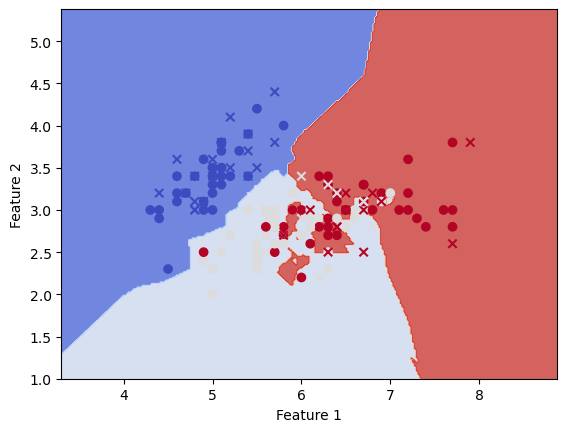

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization purposes
y = iris.target

# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Plot the decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 2 col array combination 
mat = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(mat)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)

# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='x')

# Add labels and show the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

---

#### 2.4 분류 예측의 불확실성 추정   
    - 2.4.1 결정 함수   
    - 2.4.2 예측 확률   
    - 2.4.3 다중 분류에서의 불확실성


In [4]:
os.getcwd()

'/Users/home/Desktop/ML/ch2/.ipynb_checkpoints'


### 참고 자료

- [Gudmundsson, J. (2017) Spatio-Temporal Analysis](https://dl.acm.org/doi/abs/10.1145/3054132)
- [Breiman, L. (2001) RANDOM FORESTS](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf)
- [DKA, K. (2022) Gis Lecture](https://github.com/KIM-DKA/gis_lecture/blob/main/lecture/gis_lecture2.ipynb)
